In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix,mean_squared_error,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('healthcare_dataset.csv')


In [3]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [4]:
if 'Name' in df.columns:
    df.drop(['Name','Date of Admission','Doctor','Hospital','Room Number','Discharge Date'],axis=1,inplace=True)
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   Blood Type          10000 non-null  object 
 3   Medical Condition   10000 non-null  object 
 4   Insurance Provider  10000 non-null  object 
 5   Billing Amount      10000 non-null  float64
 6   Admission Type      10000 non-null  object 
 7   Medication          10000 non-null  object 
 8   Test Results        10000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 703.3+ KB


In [6]:
df.describe()

,Age,Billing Amount
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112566
75%,68.000000,37733.913727
max,85.000000,49995.902283


In [7]:
df['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f0ad4c11f0>,
 [Text(0.51288941008327, 0.973110709541538, 'Inconclusive'),
  Text(-1.197885306991052, -0.07120948879856806, 'Normal'),
  Text(0.6215249132917477, -1.0265022075756514, 'Abnormal')],
 [Text(0.27975786004542, 0.5307876597499297, '34.6%'),
  Text(-0.6987664290781136, -0.041538868465831366, '32.8%'),
  Text(0.3625561994201862, -0.5987929544191298, '32.7%')])

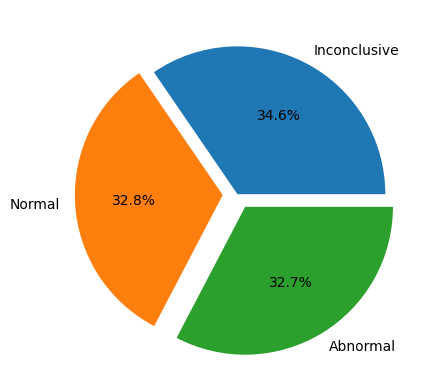

In [8]:
plt.pie(df['Test Results'].value_counts(),explode=[0,0.1,0.1],labels=['Inconclusive', 'Normal', 'Abnormal'],autopct="%0.1f%%")

<Axes: xlabel='Test Results', ylabel='count'>

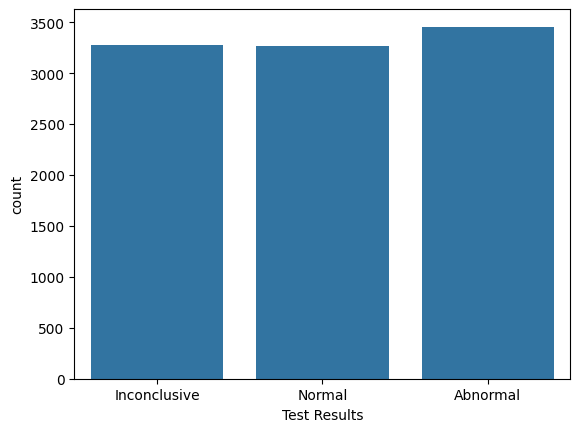

In [9]:
sns.countplot(data=df,x='Test Results')

In [10]:
df['Blood Type'].unique() 

array(['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f0ad711880>,
 [Text(1.0129300313678034, 0.4289204489800188, 'O-'),
  Text(0.4023652899650649, 1.0237686132282673, 'O+'),
  Text(-0.44256440958155496, 1.0070435657764414, 'B-'),
  Text(-1.025027629437741, 0.39914703918386485, 'AB+'),
  Text(-1.008152678187568, -0.44003201867958863, 'A+'),
  Text(-0.4055795934805274, -1.0224994833016643, 'AB-'),
  Text(0.4314648108006903, -1.0118488607695937, 'A-'),
  Text(1.0178471889071177, -0.4171176093548178, 'B+')],
 [Text(0.5525072898369836, 0.2339566085345557, '12.7%'),
  Text(0.21947197634458082, 0.5584192435790548, '12.6%'),
  Text(-0.2413987688626663, 0.5492964904235134, '12.5%'),
  Text(-0.5591059796933131, 0.21771656682756263, '12.5%'),
  Text(-0.5499014608295826, -0.24001746473432103, '12.4%'),
  Text(-0.22122523280756037, -0.5577269908918168, '12.4%'),
  Text(0.23534444225492196, -0.5519175604197784, '12.4%'),
  Text(0.5551893757675187, -0.22751869601171876, '12.4%')])

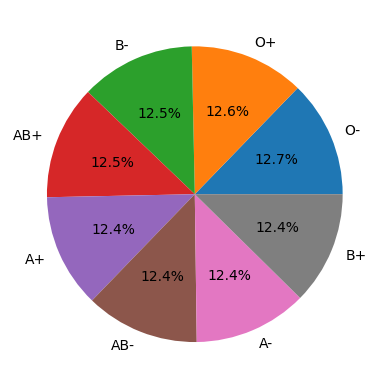

In [11]:
plt.pie(df['Blood Type'].value_counts(),labels=['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+'],autopct="%0.1f%%")

<Axes: xlabel='Blood Type', ylabel='count'>

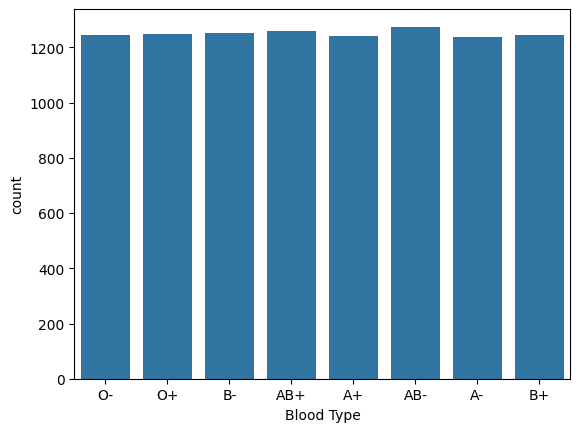

In [12]:
sns.countplot(data=df,x='Blood Type')

In [13]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f0ad5aedb0>,
 [Text(-0.025915716606368096, 1.099694673822138, 'Female'),
  Text(0.0282716908433105, -1.1996669168968779, 'Male')],
 [Text(-0.014135845421655323, 0.5998334584484389, '50.7%'),
  Text(0.01649181965859779, -0.6998057015231788, '49.3%')])

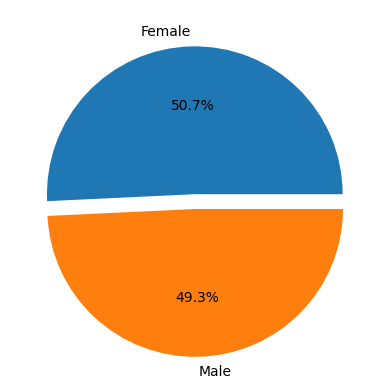

In [14]:
plt.pie(df['Gender'].value_counts(),labels=['Female', 'Male'],explode=[0,0.1],autopct="%0.1f%%")

<Axes: xlabel='Gender', ylabel='count'>

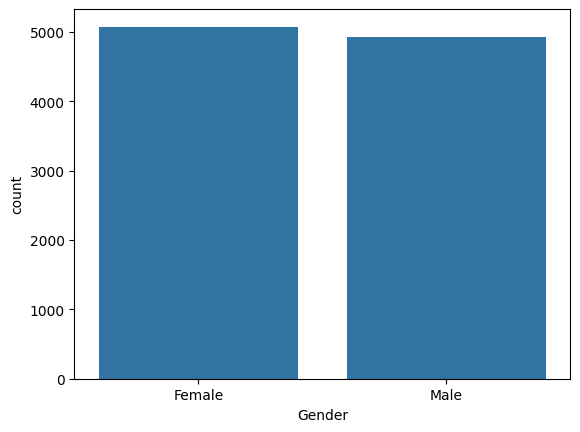

In [15]:
sns.countplot(data=df,x='Gender')


In [16]:
df['Medical Condition'].unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f0b076fda0>,
 [Text(0.9454059434453517, 0.5623233963638757, 'Diabetes'),
  Text(-0.04111389592162076, 1.0992313894545345, 'Asthma'),
  Text(-0.9816712330362056, 0.49630795906289465, 'Obesity'),
  Text(-0.9197673469848872, -0.6033473522112965, 'Arthritis'),
  Text(0.04353117155457851, -1.099138315728774, 'Hypertension'),
  Text(0.9600831699669653, -0.5368801605071503, 'Cancer')],
 [Text(0.51567596915201, 0.30672185256211404, '17.1%'),
  Text(-0.022425761411793144, 0.5995807578842914, '17.0%'),
  Text(-0.5354570362015666, 0.2707134322161243, '16.9%'),
  Text(-0.5016912801735748, -0.32909855575161623, '16.5%'),
  Text(0.023744275393406455, -0.599529990397513, '16.3%'),
  Text(0.5236817290728901, -0.292843723912991, '16.2%')])

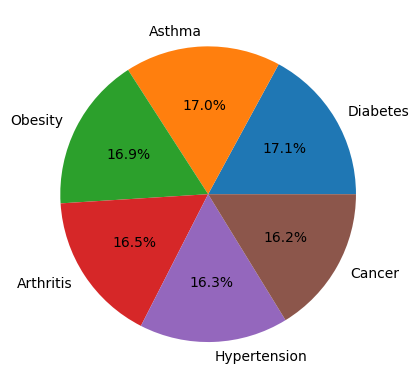

In [17]:
plt.pie(df['Medical Condition'].value_counts(),
        labels=['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension','Cancer']
        ,autopct="%0.1f%%")

<Axes: xlabel='Medical Condition', ylabel='count'>

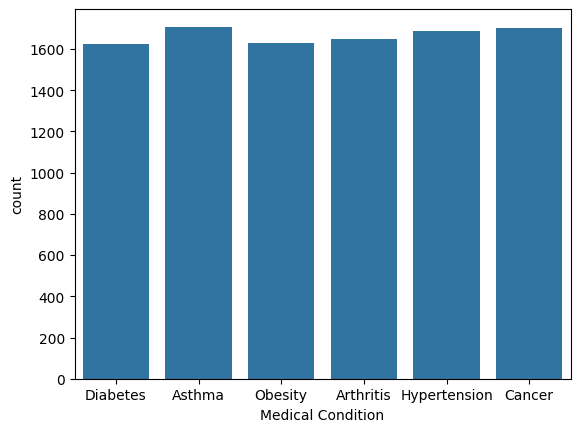

In [18]:
sns.countplot(data=df,x='Medical Condition')


In [19]:
df['Medical Condition'].isnull().sum() , df['Gender'].isnull().sum() , df['Blood Type'].isnull().sum() ,  df['Test Results'].isnull().sum()

(0, 0, 0, 0)

In [20]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal


<Axes: title={'center': 'Abnormal patient age'}, xlabel='Age', ylabel='Count'>

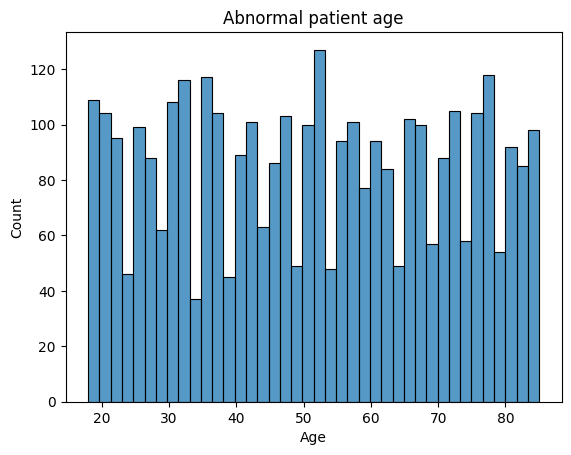

In [21]:
Abnormal_age=df.Age[df['Test Results']=='Abnormal']
plt.title('Abnormal patient age')
sns.histplot(x=Abnormal_age,bins=40)

<Axes: title={'center': 'Normal patient age'}, xlabel='Age', ylabel='Count'>

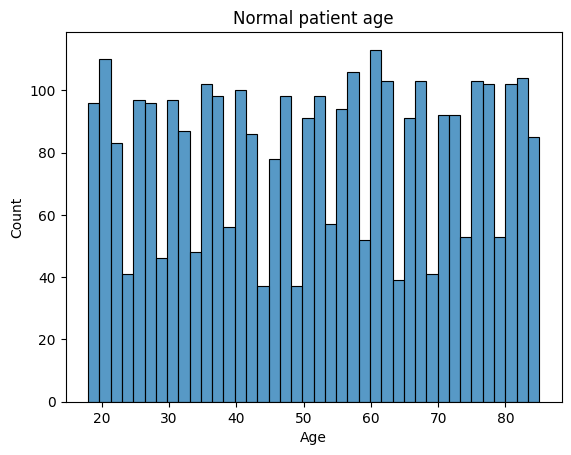

In [22]:
Normal_age=df.Age[df['Test Results']=='Normal']
plt.title('Normal patient age')

sns.histplot(x=Normal_age,bins=40)

<Axes: title={'center': 'Inconclusive patient age'}, xlabel='Age', ylabel='Count'>

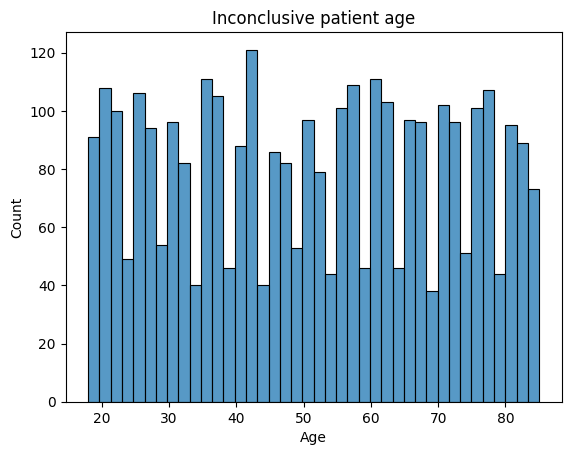

In [23]:
Inconclusive_age=df.Age[df['Test Results']=='Inconclusive']
plt.title('Inconclusive patient age')

sns.histplot(x=Inconclusive_age,bins=40)

<Axes: xlabel='Test Results', ylabel='Age'>

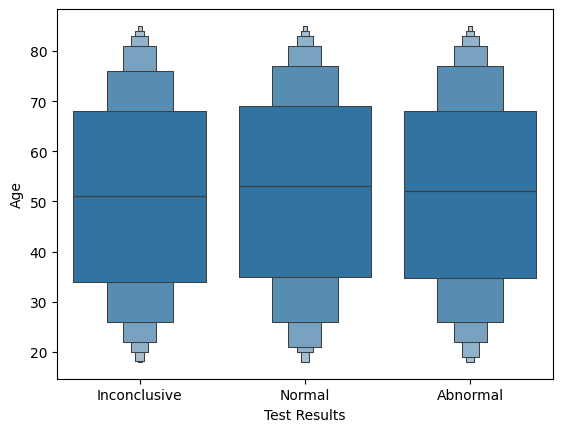

In [24]:
sns.boxenplot(data=df,x="Test Results",y="Age")

In [25]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal


In [26]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Blood Type']=encoder.fit_transform(df['Blood Type'])
df['Medical Condition']=encoder.fit_transform(df['Medical Condition'])
df['Insurance Provider']=encoder.fit_transform(df['Insurance Provider'])
df['Admission Type']=encoder.fit_transform(df['Admission Type'])
df['Medication']=encoder.fit_transform(df['Medication'])
df['Test Results']=encoder.fit_transform(df['Test Results'])

In [27]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,81,0,7,3,3,37490.983364,0,0,1
1,35,1,6,1,4,47304.064845,1,2,2
2,61,1,5,5,3,36874.896997,1,2,2
3,49,1,5,1,3,23303.322092,2,4,0
4,51,1,7,0,4,18086.344184,2,3,2
...,...,...,...,...,...,...,...,...,...
9995,83,1,0,5,4,39606.840083,0,1,0
9996,47,0,2,0,1,5995.717488,1,1,2
9997,54,1,5,0,1,49559.202905,0,1,2
9998,84,1,0,0,4,25236.344761,2,4,2


In [28]:
# ['Inconclusive', 'Normal', 'Abnormal']
# [1, 2, 0]

# ['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+']
# [7, 6, 5, 2, 0, 3, 1, 4]

# ['Female', 'Male']
# [0, 1]

# ['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension','Cancer']
# [3, 1, 5, 0, 4, 2]

# ['Medicare', 'UnitedHealthcare', 'Aetna', 'Cigna', 'Blue Cross']
# [3, 4, 0, 2, 1]

# ['Elective', 'Emergency', 'Urgent']
# [0, 1, 2]

# ['Aspirin', 'Lipitor', 'Penicillin', 'Paracetamol', 'Ibuprofen']
# [0, 2, 4, 3, 1]

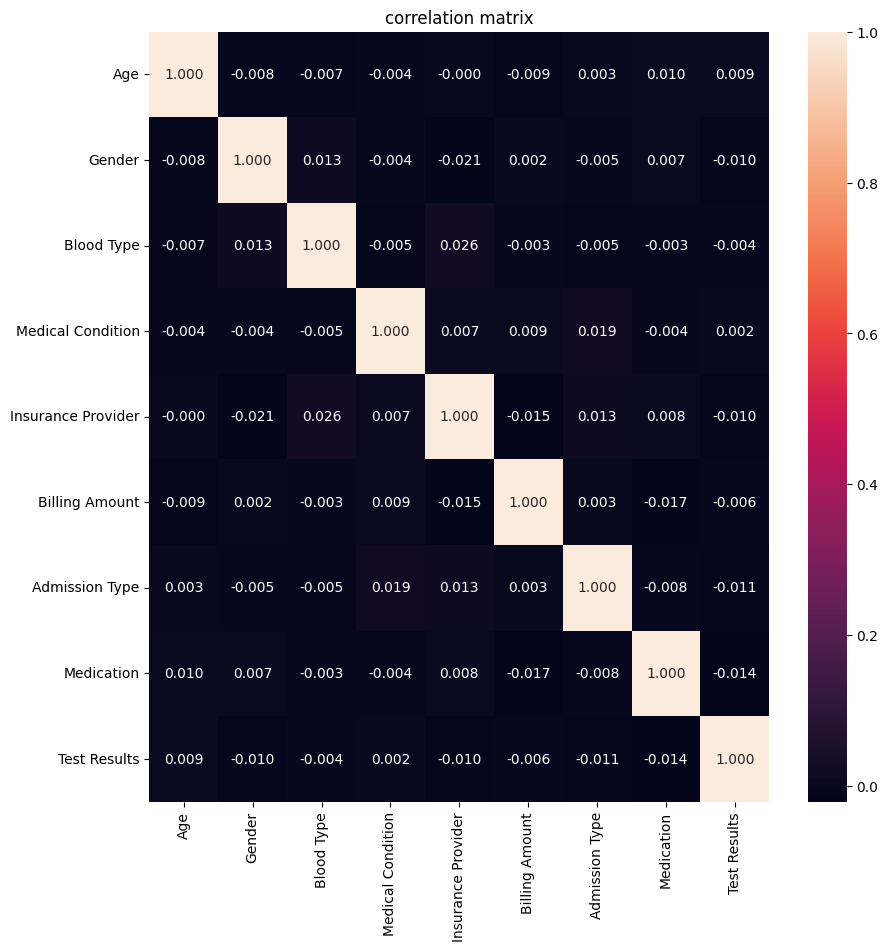

In [29]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,fmt='0.3f',color='r')
plt.title('correlation matrix')
plt.show()

In [30]:
threshold=0.008
feature=corr_matrix.index[abs(corr_matrix['Test Results'])>=threshold].to_list()
feature.remove("Test Results")
feature

['Age', 'Gender', 'Insurance Provider', 'Admission Type', 'Medication']

In [31]:
x=df[feature]
y=df['Test Results']

In [32]:
x.shape

(10000, 5)

In [33]:
y.shape

(10000,)

In [34]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.94029851, 0.        , 0.75      , 0.        , 0.        ],
       [0.25373134, 1.        , 1.        , 0.5       , 0.5       ],
       [0.64179104, 1.        , 0.75      , 0.5       , 0.5       ],
       ...,
       [0.53731343, 1.        , 0.25      , 0.        , 0.25      ],
       [0.98507463, 1.        , 1.        , 1.        , 1.        ],
       [0.02985075, 1.        , 0.        , 0.5       , 1.        ]])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [36]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (7500, 5)
y_train shape (7500,)
x_test shape (2500, 5)
y_test shape (2500,)


In [37]:
model = xgb.XGBRFClassifier(objective='reg:squarederror', n_estimators=300, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(model.score(x_test,y_test))

0.3372


In [38]:
from joblib import dump

dump(model, 'healthcare_model.joblib')


['healthcare_model.joblib']